In [2]:
import os
os.environ['OMP_NUM_THREADS'] = '3' # for windows threading issue

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [3]:
# In this problem, you are required to apply various clustering and dimensionality reduction
# techniques on a given dataset synthetic_dataset_Q2.csv. This artificial dataset contains instances
# from 5 non-convex clusters. The dataset includes three attributes (A, B, C) for each instance,
# delimited by commas.

In [4]:
df = pd.read_csv('data/synthetic_dataset_Q2.csv', delimiter=',')

In [5]:
# 1. Preprocessing the Dataset:
# a. Remove records containing missing values (left empty or marked as ‘?’ in the dataset).
# b. Normalize the attributes A, B, and C to a range of [0, 1] for uniform scaling.

# Remove records containing missing values
df = df.replace('?', np.nan)
df = df.dropna()

# Normalize the attributes A, B, and C
df[['A', 'B', 'C']] = df[['A', 'B', 'C']].astype(float)

# Scale the data
scaler = StandardScaler()
df[['A', 'B', 'C']] = scaler.fit_transform(df[['A', 'B', 'C']])


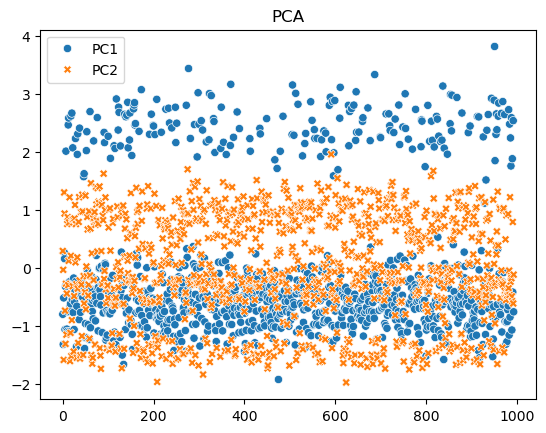

In [6]:
# 2. Principal Component Analysis (PCA):
# a. Perform PCA on the pre-processed dataset to reduce the dimensionality to 2 components.
# b. Plot the data in the reduced 2D space using a scatter plot.

# Using PCA to reduce the dimensionality to 2 components
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df[['A', 'B', 'C']])
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

plt.figure()
sns.scatterplot(data=df_pca)
plt.title('PCA')
plt.show()

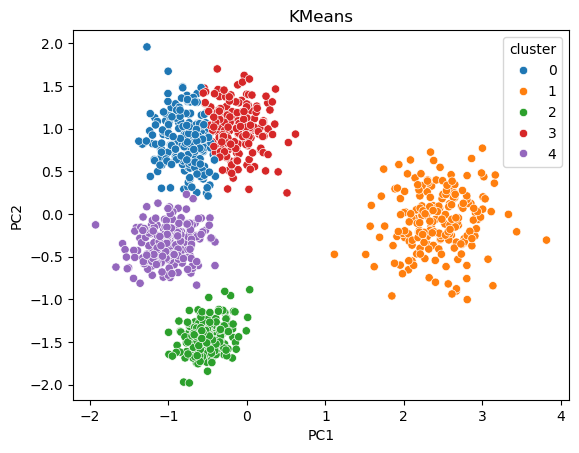

In [7]:
# 3. Clustering with K-means:
# a. Apply the K-means algorithm on the reduced dataset from PCA to generate 5 clusters.
# b. Visualize the clusters using a scatter plot in the 2D PCA space.

# Apply the K-means algorithm to generate 5 clusters
kmeans = KMeans(n_clusters=5)
df_pca['cluster'] = kmeans.fit_predict(df_pca)

plt.figure()
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster', palette='tab10')
plt.title('KMeans')
plt.show()

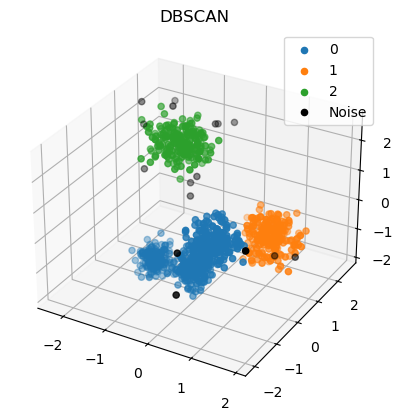

In [8]:
# 4. Clustering with DBSCAN:
# a. Apply DBSCAN on the original dataset (not PCA-reduced) using as parameters ε=0.4 and
# minPts=5.
# b. Visualize the clusters using a 3D scatter plot with A, B, and C as axes. Mark noise points
# distinctly.

# Apply DBSCAN on the original dataset
dbscan = DBSCAN(eps=0.4, min_samples=5)
df['cluster'] = dbscan.fit_predict(df[['A', 'B', 'C']])
df['cluster'] = df['cluster'].apply(lambda x: 'Noise' if x == -1 else x)

# Visualize the clusters using a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for cluster in df['cluster'].unique():
    # Mark noise points distinctly
    if cluster == 'Noise':
        color = 'black'
    else:
        color = plt.cm.tab10(cluster)

    # Plot the clusters
    ax.scatter(df[df['cluster'] == cluster]['A'], df[df['cluster'] == cluster]['B'], df[df['cluster'] == cluster]['C'], color=color, label=cluster)

plt.title('DBSCAN')
plt.legend()
plt.show()

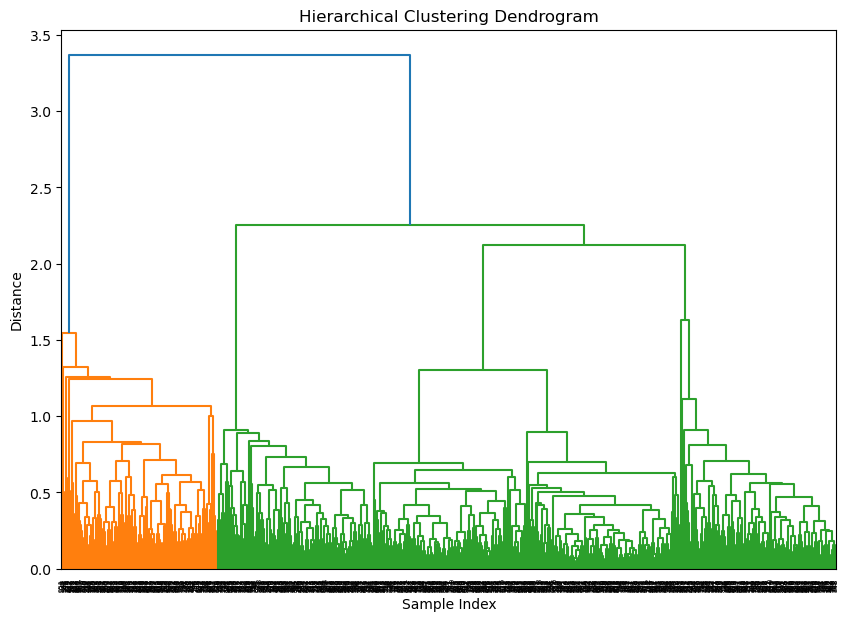

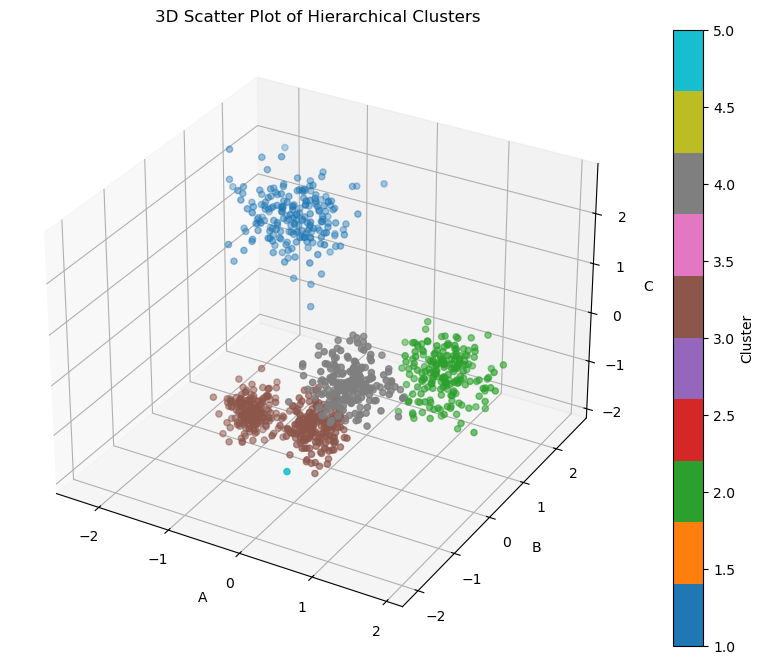

In [ ]:
# 5. Clustering with hierarchical clustering
# a. Apply the average-linkage hierarchical clustering algorithm to the original dataset to identify 5
# clusters.
# b. Visualize the clusters in a 3D scatter plot with A, B, and C as axes.

# Apply the average-linkage hierarchical clustering algorithm to identify 5 clusters
linkage_matrix = linkage(df[['A', 'B', 'C']], method='average')

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# Visualize the clusters in a 3D scatter plot
clusters = fcluster(linkage_matrix, t=5, criterion='maxclust')

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df['A'], 
                    df['B'], 
                    df['C'],
                    c=clusters,
                    cmap='tab10')

ax.set_xlabel('A')
ax.set_ylabel('B')
ax.set_zlabel('C')
plt.title('3D Scatter Plot of Hierarchical Clusters')

plt.colorbar(scatter, label='Cluster')
plt.show()